<a href="https://colab.research.google.com/github/Shubham-naik-ai/Jforce/blob/main/Jforce_assignment_2(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing usefull libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/Jforce/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [ ]:
#Loading the Dataset
df = pd.read_csv(working_dir_path + 'lending_club_loans - lending_club_loans.csv',skiprows=1)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Checking the dimensions
df.shape

(42542, 115)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


In [ ]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

id                                4
member_id                         7
loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
                              ...  
tax_liens                       112
tot_hi_cred_lim               42542
total_bal_ex_mort             42542
total_bc_limit                42542
total_il_high_credit_limit    42542
Length: 115, dtype: int64

In [ ]:
# Set the threshold for the percentage of null values
threshold = 0.7

# Calculate the percentage of null values in each column
null_percentage = df.isnull().sum() / len(df)

# Create a list of columns to drop
cols_to_drop = null_percentage[null_percentage > threshold].index.tolist()

# Drop the columns from the DataFrame
df = df.drop(cols_to_drop, axis=1)

# Print the updated DataFrame
print(df)

                                                    id  member_id  loan_amnt  \
0                                              1077501  1296599.0     5000.0   
1                                              1077430  1314167.0     2500.0   
2                                              1077175  1313524.0     2400.0   
3                                              1076863  1277178.0    10000.0   
4                                              1075358  1311748.0     3000.0   
...                                                ...        ...        ...   
42537                                            70686    70681.0     5000.0   
42538                                              NaN        NaN        NaN   
42539                                              NaN        NaN        NaN   
42540  Total amount funded in policy code 1: 460296150        NaN        NaN   
42541          Total amount funded in policy code 2: 0        NaN        NaN   

       funded_amnt  funded_amnt_inv    

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_a

In [ ]:
df.isnull().sum()

id                                4
member_id                         7
loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
term                              7
int_rate                          7
installment                       7
grade                             7
sub_grade                         7
emp_title                      2633
emp_length                     1119
home_ownership                    7
annual_inc                       11
verification_status               7
issue_d                           7
loan_status                       7
pymnt_plan                        7
url                               7
desc                          13300
purpose                           7
title                            20
zip_code                          7
addr_state                        7
dti                               7
delinq_2yrs                      36
earliest_cr_line                 36
fico_range_low              

In [ ]:
df.shape

(42542, 59)

In [ ]:
df.drop(['desc'],axis = 1 ,inplace = True)

In [ ]:
df.drop(['mths_since_last_delinq'],axis = 1, inplace = True)

In [ ]:
df.drop(['emp_title'],axis = 1, inplace = True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

In [ ]:
df.shape

(39913, 56)

# **EDA**

In [ ]:
# Counting observations from 'term'
df["term"].value_counts()

 36 months    29211
 60 months    10702
Name: term, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


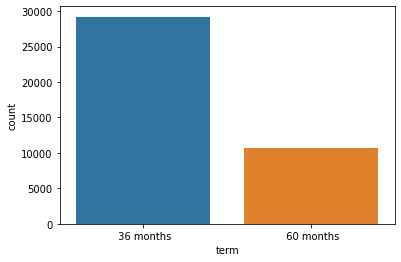

In [ ]:
# Ploting observations from 'term'

sns.countplot(df['term'])
plt.show()

From above graph we can see that most of the users choose 36 months tenure.

In [ ]:
# Counting observations from 'high_risk_applicants'
df["loan_status"].value_counts()

Fully Paid                                             32138
Charged Off                                             5225
Does not meet the credit policy. Status:Fully Paid      1506
Does not meet the credit policy. Status:Charged Off      518
Current                                                  494
In Grace Period                                           15
Late (31-120 days)                                        12
Late (16-30 days)                                          4
Default                                                    1
Name: loan_status, dtype: int64

In [ ]:
df['loan_status'] = df['loan_status'].replace({'Does not meet the credit policy. Status:Charged Off':'Charged Off',
                                               'Default':'Charged Off','Does not meet the credit policy. Status:Fully Paid':'Fully Paid',
                                               'Current':'Fully Paid'})

In [ ]:
df["loan_status"].value_counts()

Fully Paid            34138
Charged Off            5744
In Grace Period          15
Late (31-120 days)       12
Late (16-30 days)         4
Name: loan_status, dtype: int64

In [ ]:
df = df[df.loan_status != 'In Grace Period']

In [ ]:
df = df[df.loan_status != 'Late (31-120 days)']

In [ ]:
df = df[df.loan_status != 'Late (16-30 days)']

In [ ]:
df["loan_status"].value_counts()

Fully Paid     34138
Charged Off     5744
Name: loan_status, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


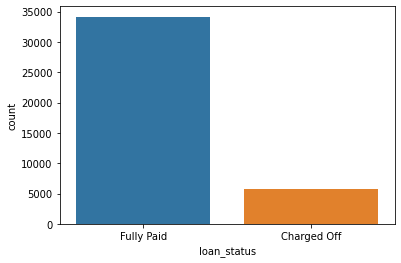

In [ ]:
# Ploting observations from 'loan_status'

sns.countplot(df['loan_status'])
plt.show()

In above graph we can see that more than 34000 users had Fully paid and 5700 are Charged Off

In [ ]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [ ]:
#remove years,+,NAN   ... /d is matching decimal digit
import re

df["emp_length"]=[0 if str(x) =="< 1 year" else x if str(x) == "nan" else int(re.findall(r'\d+',str(x))[0]) for x in (df['emp_length'])]
df["emp_length"].head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length, dtype: int64

In [ ]:
df.emp_length.unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


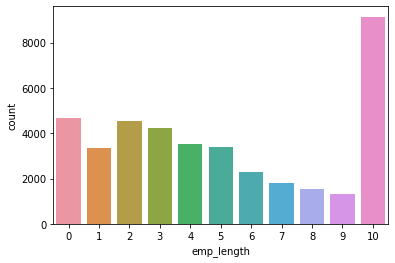

In [ ]:
# Ploting observations from 'emp_length'

sns.countplot(df['emp_length'])
plt.show()

In [ ]:
df["home_ownership"].value_counts()

RENT        18872
MORTGAGE    17974
OWN          2902
OTHER         134
Name: home_ownership, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


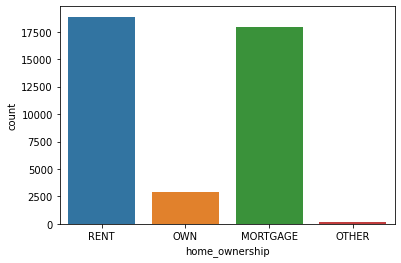

In [ ]:
# Ploting observations from 'home_ownership'

sns.countplot(df['home_ownership'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


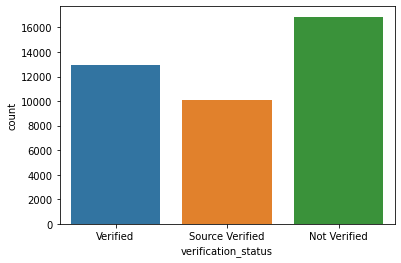

In [ ]:
# Ploting observations from 'verification_status'

sns.countplot(df['verification_status'])
plt.show()

In [ ]:
df["purpose"].value_counts()

debt_consolidation    18729
credit_card            5154
other                  4010
home_improvement       3006
major_purchase         2186
small_business         1830
car                    1530
wedding                 959
medical                 700
moving                  578
house                   393
vacation                358
educational             352
renewable_energy         97
Name: purpose, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


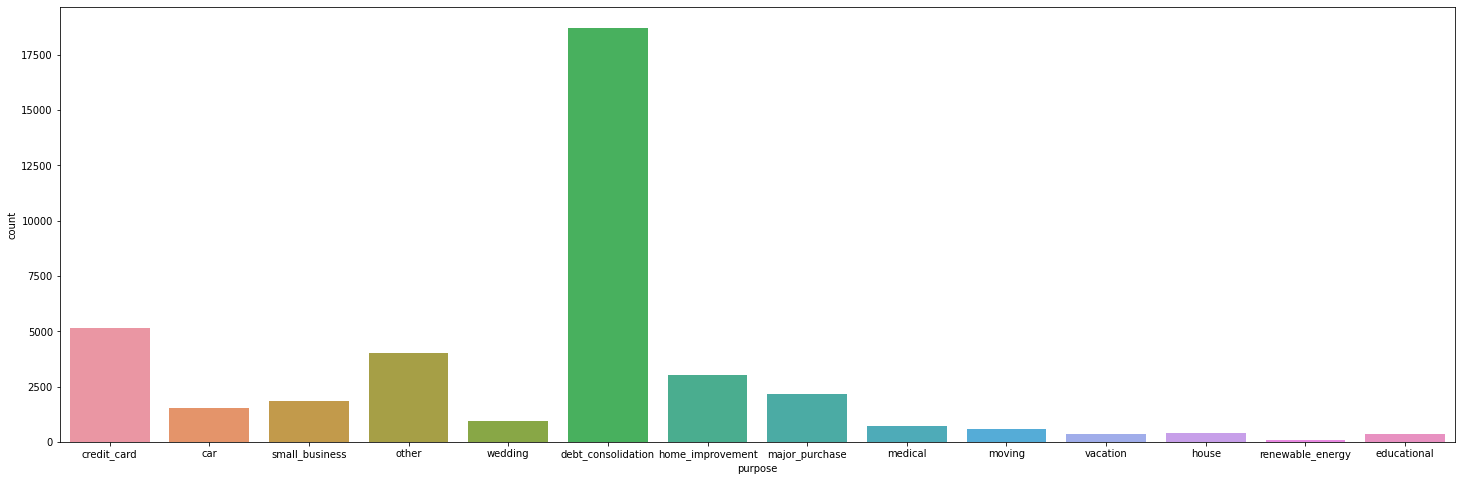

In [ ]:
# Ploting observations from 'verification_status'
plt.figure(figsize = (25,8))
sns.countplot(df['purpose'])
plt.show()

<AxesSubplot:xlabel='grade'>

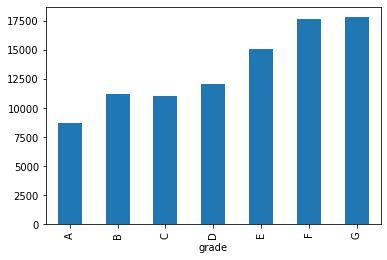

In [ ]:
df.groupby('grade')['loan_amnt'].mean().round(0).plot.bar()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


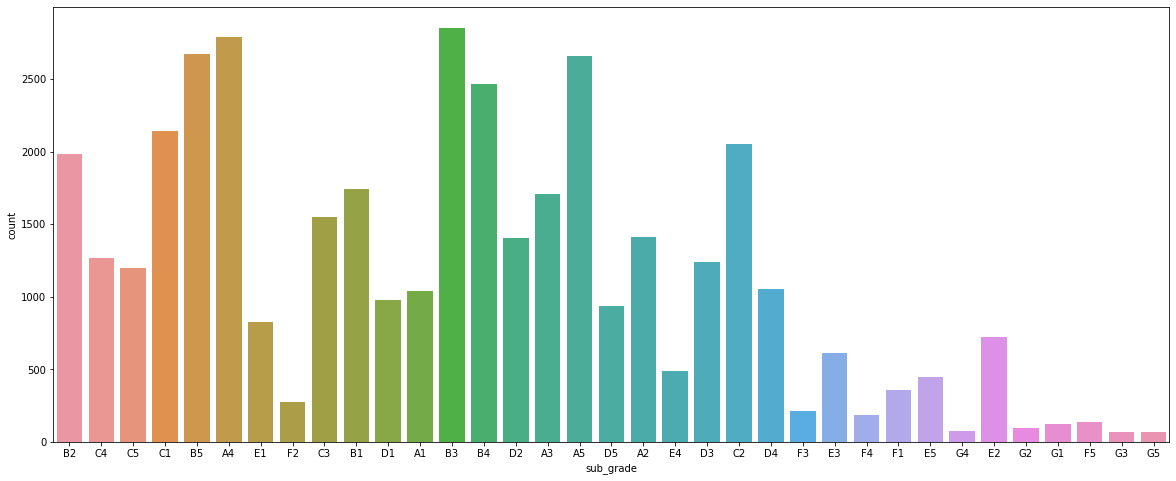

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(df['sub_grade'])
plt.show()

In [ ]:
df['fico_range_low'] = df['fico_range_low'].astype(int)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


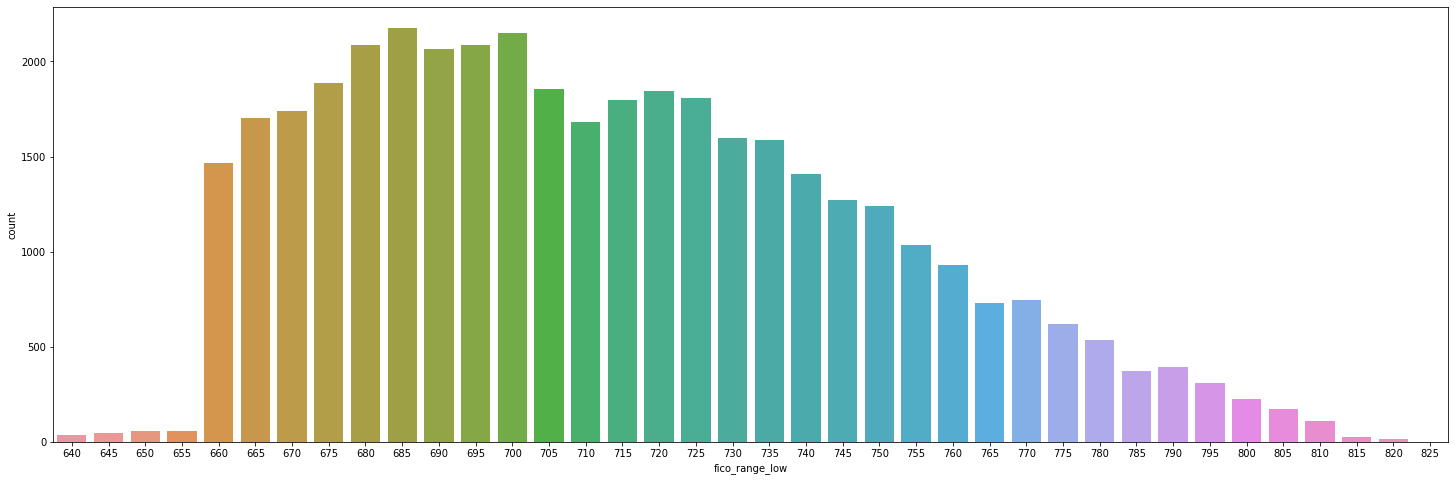

In [ ]:
plt.figure(figsize = (25,8))
sns.countplot(df['fico_range_low'])
plt.show()

In [ ]:
df['fico_range_high'] = df['fico_range_high'].astype(int)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


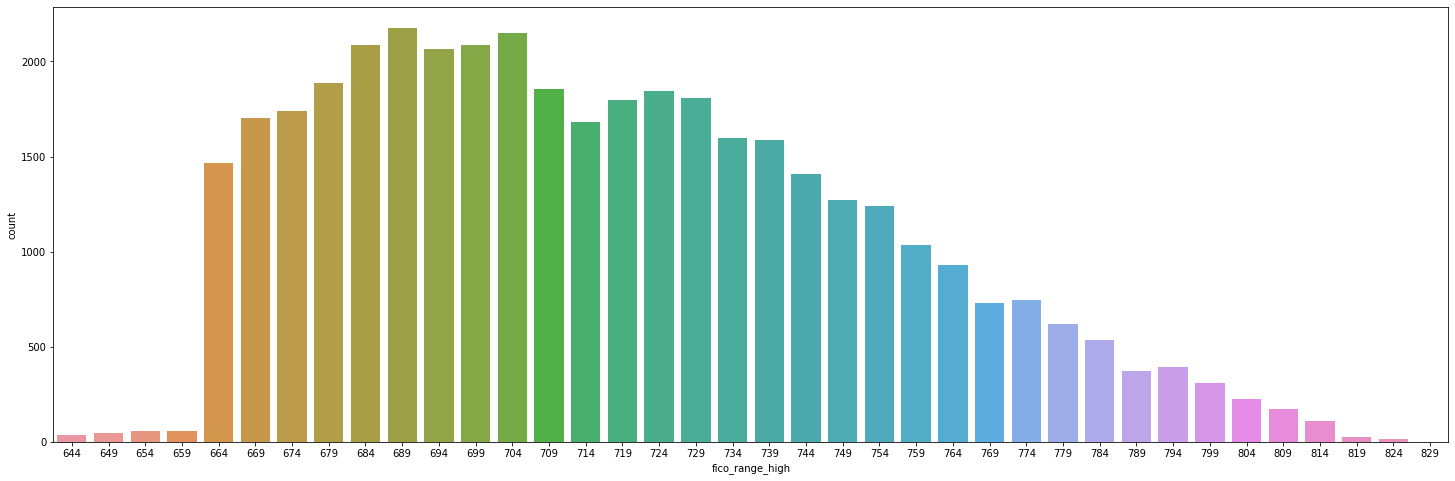

In [ ]:
plt.figure(figsize = (25,8))
sns.countplot(df['fico_range_high'])
plt.show()

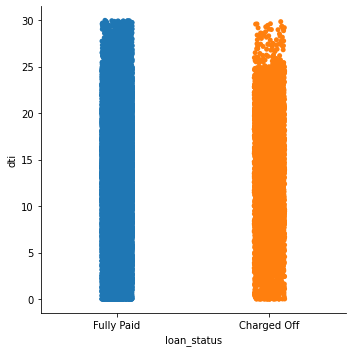

In [ ]:
sns.catplot(x="loan_status", y="dti",kind="strip",data=df)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


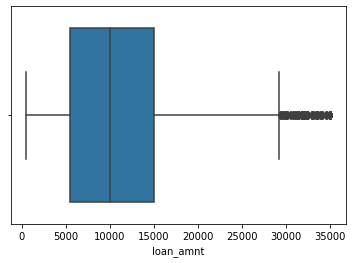

In [ ]:
ax=sns.boxplot(df["loan_amnt"],orient='h')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

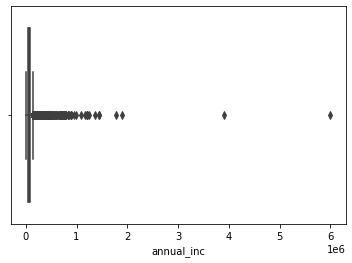

In [ ]:
sns.boxplot(df["annual_inc"])

In [ ]:
df['annual_inc'].describe()

count    3.988200e+04
mean     6.995344e+04
std      6.403893e+04
min      3.300000e+03
25%      4.171890e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [ ]:
df[df['annual_inc']>1000000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
7268,884755,1100269.0,12025.0,12025.0,12000.00000,36 months,14.27%,412.57,C,C2,...,734.0,730.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
10650,830027,1039166.0,15775.0,15775.0,15750.00000,60 months,12.99%,358.85,C,C1,...,549.0,545.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
21477,643368,823374.0,10000.0,10000.0,9500.00000,36 months,6.54%,306.68,A,A4,...,674.0,670.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
23618,611872,784585.0,1500.0,1500.0,1500.00000,36 months,6.17%,45.75,A,A3,...,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
24233,603818,774761.0,25000.0,25000.0,24493.46353,60 months,15.20%,597.38,D,D4,...,724.0,720.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
25831,572697,736657.0,12000.0,12000.0,12000.00000,36 months,7.51%,373.33,A,A4,...,759.0,755.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
27633,551367,710553.0,5600.0,5600.0,5600.00000,60 months,13.61%,129.18,C,C2,...,769.0,765.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
28975,528009,682915.0,4500.0,4500.0,4500.00000,60 months,7.88%,90.99,A,A5,...,669.0,665.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
29708,519954,672152.0,25000.0,15500.0,11430.00082,60 months,10.62%,334.08,B,B3,...,684.0,680.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
30176,513542,663575.0,5000.0,5000.0,5000.00000,36 months,12.73%,167.84,C,C1,...,759.0,755.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
df =df.drop([7268,10650,21477,23618,24233,25831,27633,28975,29708,30176,33501,34051,34051,34373,40532])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

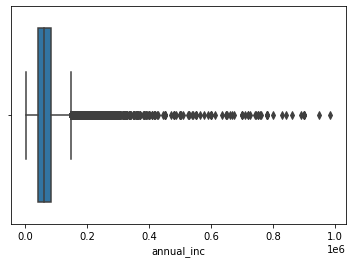

In [ ]:
sns.boxplot(df["annual_inc"])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


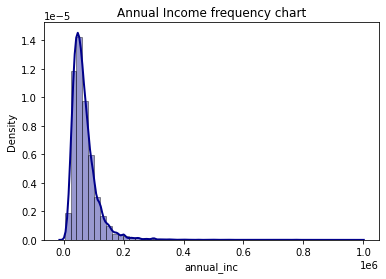

In [ ]:
#we will try to understand ab that plot using frequency distribution
#it is normally distributed with right tail.. we can say that there can be some people with greater income per annum
sns.distplot(df['annual_inc'].dropna(), hist=True,color="darkblue",
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income frequency chart'); 
plt.show()

In [ ]:

df["verification_status"].value_counts()

Not Verified       16861
Verified           12943
Source Verified    10064
Name: verification_status, dtype: int64

In [ ]:
df["int_rate"].value_counts()

10.99%    946
13.49%    816
11.49%    805
7.51%     754
7.88%     714
         ... 
10.46%      1
9.01%       1
9.83%       1
13.30%      1
17.86%      1
Name: int_rate, Length: 360, dtype: int64

In [ ]:
df["home_ownership"].value_counts()

RENT        18870
MORTGAGE    17963
OWN          2901
OTHER         134
Name: home_ownership, dtype: int64

In [ ]:
df["purpose"].value_counts()

debt_consolidation    18722
credit_card            5153
other                  4008
home_improvement       3004
major_purchase         2184
small_business         1830
car                    1530
wedding                 959
medical                 700
moving                  578
house                   393
vacation                358
educational             352
renewable_energy         97
Name: purpose, dtype: int64

In [ ]:
df["total_acc"].value_counts()

16.0    1464
15.0    1461
17.0    1452
14.0    1444
20.0    1430
        ... 
72.0       1
70.0       1
87.0       1
77.0       1
74.0       1
Name: total_acc, Length: 82, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_acc'>

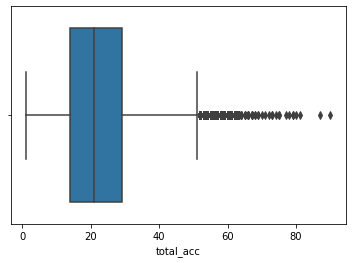

In [ ]:
sns.boxplot(df["total_acc"])

In [ ]:
num_var = df.select_dtypes(exclude='object')
for i in num_var:
    
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3 - q1
    UL = q3 + 1.5*IQR
    LL = q1 - 1.5*IQR

    print('IQR of',i,'= ',IQR)
    print('UL of',i,'= ',UL)
    print('LL of',i,'= ',LL)
    print('Number of Outliers in',i,' = ',(df.shape[0] - df[(df[i]<UL) & (df[i]>LL)].shape[0]))
    print(' ')

IQR of member_id =  384108.25
UL of member_id =  1615835.125
LL of member_id =  79402.125
Number of Outliers in member_id  =  0
 
IQR of loan_amnt =  9500.0
UL of loan_amnt =  29250.0
LL of loan_amnt =  -8750.0
Number of Outliers in loan_amnt  =  1211
 
IQR of funded_amnt =  9600.0
UL of funded_amnt =  29400.0
LL of funded_amnt =  -9000.0
Number of Outliers in funded_amnt  =  1022
 
IQR of funded_amnt_inv =  9433.16921
UL of funded_amnt_inv =  28582.923025
LL of funded_amnt_inv =  -9149.753815
Number of Outliers in funded_amnt_inv  =  981
 
IQR of installment =  264.50249999999994
UL of installment =  829.0962499999998
LL of installment =  -228.9137499999999
Number of Outliers in installment  =  1250
 
IQR of emp_length =  7.0
UL of emp_length =  19.5
LL of emp_length =  -8.5
Number of Outliers in emp_length  =  0
 
IQR of annual_inc =  42306.0
UL of annual_inc =  147459.0
LL of annual_inc =  -21765.0
Number of Outliers in annual_inc  =  1904
 
IQR of dti =  10.38
UL of dti =  34.28
LL

In [ ]:
df.shape

(39868, 56)

### Removing the outliers


In [ ]:
# IQR
Q1 = np.percentile(df['total_acc'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['total_acc'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['total_acc']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['total_acc']<=lower)

# Removing the outliers
df = df[(df['total_acc'] >= lower) & (df['total_acc'] <= upper)]

df.shape

Old Shape:  (39868, 56)


<ipython-input-197-78f67ea42faf>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['total_acc'], 25,
<ipython-input-197-78f67ea42faf>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['total_acc'], 75,


(39091, 56)

In [ ]:
# IQR
Q1 = np.percentile(df['annual_inc'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['annual_inc'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['annual_inc']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['annual_inc']<=lower)

# Removing the outliers
df = df[(df['annual_inc'] >= lower) & (df['annual_inc'] <= upper)]

df.shape

Old Shape:  (39091, 56)


<ipython-input-198-1accd9449fcf>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['annual_inc'], 25,
<ipython-input-198-1accd9449fcf>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['annual_inc'], 75,


(37223, 56)

In [ ]:
# IQR
Q1 = np.percentile(df['loan_amnt'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['loan_amnt'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['loan_amnt']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['loan_amnt']<=lower)

# Removing the outliers
df = df[(df['loan_amnt'] >= lower) & (df['loan_amnt'] <= upper)]

df.shape

Old Shape:  (37223, 56)


<ipython-input-199-c344b834e6fc>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['loan_amnt'], 25,
<ipython-input-199-c344b834e6fc>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['loan_amnt'], 75,


(36633, 56)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_acc'>

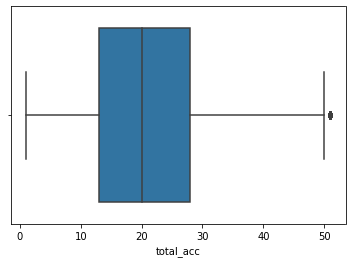

In [ ]:
sns.boxplot(df["total_acc"])

In [ ]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4         Fully Paid
            ...     
42315    Charged Off
42371    Charged Off
42372     Fully Paid
42373    Charged Off
42388     Fully Paid
Name: loan_status, Length: 36633, dtype: object

In [ ]:
#Applying Label Encoding to Loan Status
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df.loan_status)
print(le.classes_)

['Charged Off' 'Fully Paid']


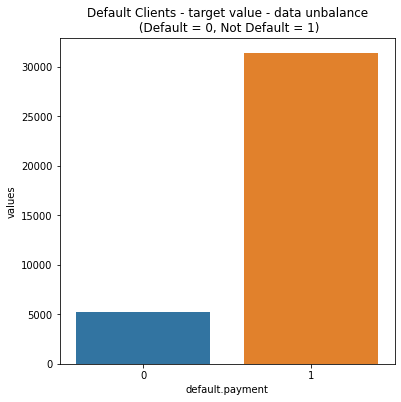

In [ ]:
temp = df["loan_status"].value_counts()
df1 = pd.DataFrame({'default.payment': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
# move the 'Gender' column to the last position
lon_col = df.pop('loan_status')
df.insert(len(df.columns), 'loan_status', lon_col)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36633 entries, 0 to 42388
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36633 non-null  object 
 1   member_id                   36633 non-null  float64
 2   loan_amnt                   36633 non-null  float64
 3   funded_amnt                 36633 non-null  float64
 4   funded_amnt_inv             36633 non-null  float64
 5   term                        36633 non-null  object 
 6   int_rate                    36633 non-null  object 
 7   installment                 36633 non-null  float64
 8   grade                       36633 non-null  object 
 9   sub_grade                   36633 non-null  object 
 10  emp_length                  36633 non-null  int64  
 11  home_ownership              36633 non-null  object 
 12  annual_inc                  36633 non-null  float64
 13  verification_status         366

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,1
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,1
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,1
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_status'],
   

In [ ]:
df.select_dtypes(include = ['object']).columns

Index(['id', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [ ]:
columns_to_keep = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'title',  'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_status']

In [ ]:
df = df[columns_to_keep]


In [ ]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_status'],
      dtype='object')

In [ ]:
# Using Label encoder on categorical columns
df[['term','int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan',  'purpose',
       'title',  'addr_state', 'earliest_cr_line', 'revol_util',
        'last_pymnt_d', 'last_credit_pull_d',
       'application_type']] = df[['term','int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan',  'purpose',
       'title',  'addr_state', 'earliest_cr_line', 'revol_util',
        'last_pymnt_d', 'last_credit_pull_d',
       'application_type']].apply(LabelEncoder().fit_transform)
     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36633 entries, 0 to 42388
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   36633 non-null  float64
 1   funded_amnt                 36633 non-null  float64
 2   funded_amnt_inv             36633 non-null  float64
 3   term                        36633 non-null  int64  
 4   int_rate                    36633 non-null  int64  
 5   installment                 36633 non-null  float64
 6   grade                       36633 non-null  int64  
 7   sub_grade                   36633 non-null  int64  
 8   emp_length                  36633 non-null  int64  
 9   home_ownership              36633 non-null  int64  
 10  annual_inc                  36633 non-null  float64
 11  verification_status         36633 non-null  int64  
 12  issue_d                     36633 non-null  int64  
 13  pymnt_plan                  366

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Extract features and target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Create a RandomUnderSampler object to undersample the majority class
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data using the RandomUnderSampler object
X_resampled, y_resampled = rus.fit_resample(X, y)

# Print the new class distribution after undersampling
print("Resampled class distribution: ", Counter(y_resampled))

Resampled class distribution:  Counter({0: 5278, 1: 5278})


In [ ]:
columns = list(df.columns)

In [ ]:
columns.pop()

'loan_status'

In [ ]:
balance_df = pd.DataFrame(X_resampled, columns=columns)

In [ ]:
balance_df['loan_status'] = y_resampled

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

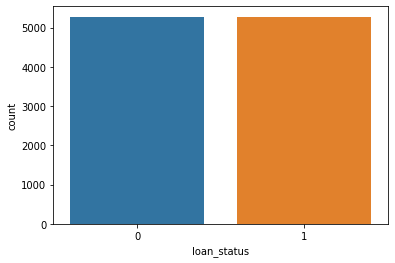

In [ ]:
sns.countplot('loan_status', data = balance_df)


In [ ]:
balance_df[balance_df['loan_status']==1]


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
5278,8000.0,8000.0,7975.000000,0,154,279.89,3,18,7,3,...,610.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
5279,4800.0,4800.0,4725.000000,0,322,148.85,0,3,10,0,...,670.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
5280,4800.0,4800.0,4300.000000,0,9,155.75,1,5,3,0,...,650.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
5281,7000.0,7000.0,6925.000000,0,155,245.02,4,20,0,3,...,625.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
5282,20000.0,20000.0,19975.000000,1,161,485.94,2,14,2,3,...,705.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10551,6000.0,6000.0,6000.000000,0,9,194.68,1,5,0,3,...,695.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
10552,18000.0,18000.0,17650.000000,0,256,666.11,4,24,10,3,...,715.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
10553,1400.0,1400.0,1400.000000,1,28,30.53,1,7,3,3,...,630.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
10554,2000.0,2000.0,2000.000000,0,163,70.32,4,21,4,3,...,640.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df = balance_df.copy()


In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
0,2500.0,2500.0,2500.0,1,143,59.83,2,13,0,3,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
1,5600.0,5600.0,5600.0,1,284,152.39,5,26,4,2,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
2,5375.0,5375.0,5350.0,1,66,121.45,1,9,0,3,...,515.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
3,9000.0,9000.0,9000.0,0,89,305.38,2,10,0,3,...,615.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
4,10000.0,10000.0,10000.0,0,16,325.74,1,6,3,3,...,650.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0


### **Feature selections by ExtraTreeClassifier**

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

[0.02714399 0.03257731 0.02479777 0.01659809 0.00735793 0.02729219
 0.01289949 0.0142688  0.00371922 0.00326659 0.00445087 0.00411204
 0.00397115 0.         0.00397741 0.00377123 0.00372724 0.00442591
 0.00207598 0.00410367 0.00541926 0.00606832 0.00442214 0.00399021
 0.00172331 0.0039531  0.00432299 0.00436856 0.00147117 0.00169473
 0.05727847 0.05062666 0.11901056 0.01196678 0.00785802 0.05084426
 0.02561234 0.00475145 0.06372647 0.16517718 0.10512724 0.09464916
 0.         0.         0.         0.         0.         0.
 0.00140076 0.        ]


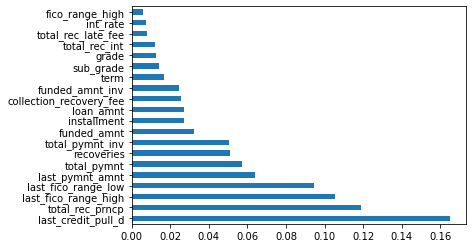

In [ ]:
#Using ExtraTreeClassifier for feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
# Check feature importance
tree_importances = model.feature_importances_
tree_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)
     

In [ ]:
#checking feature importance dataframe
tree_importance_df.head(2)

,feature,importance
39,last_credit_pull_d,0.165177
32,total_rec_prncp,0.119011


In [ ]:

#storing top 10 features
top_ten_features=tree_importance_df.head(15)

In [ ]:
top_ten_features

,feature,importance
39,last_credit_pull_d,0.165177
32,total_rec_prncp,0.119011
40,last_fico_range_high,0.105127
41,last_fico_range_low,0.094649
38,last_pymnt_amnt,0.063726
30,total_pymnt,0.057278
35,recoveries,0.050844
31,total_pymnt_inv,0.050627
1,funded_amnt,0.032577
5,installment,0.027292


In [ ]:
#creating dataframe only with top 10 features
df_final= df[['last_credit_pull_d','total_rec_prncp','last_fico_range_high','last_fico_range_low',
              'last_pymnt_amnt','total_pymnt','recoveries','total_pymnt_inv','funded_amnt','installment','loan_status']]

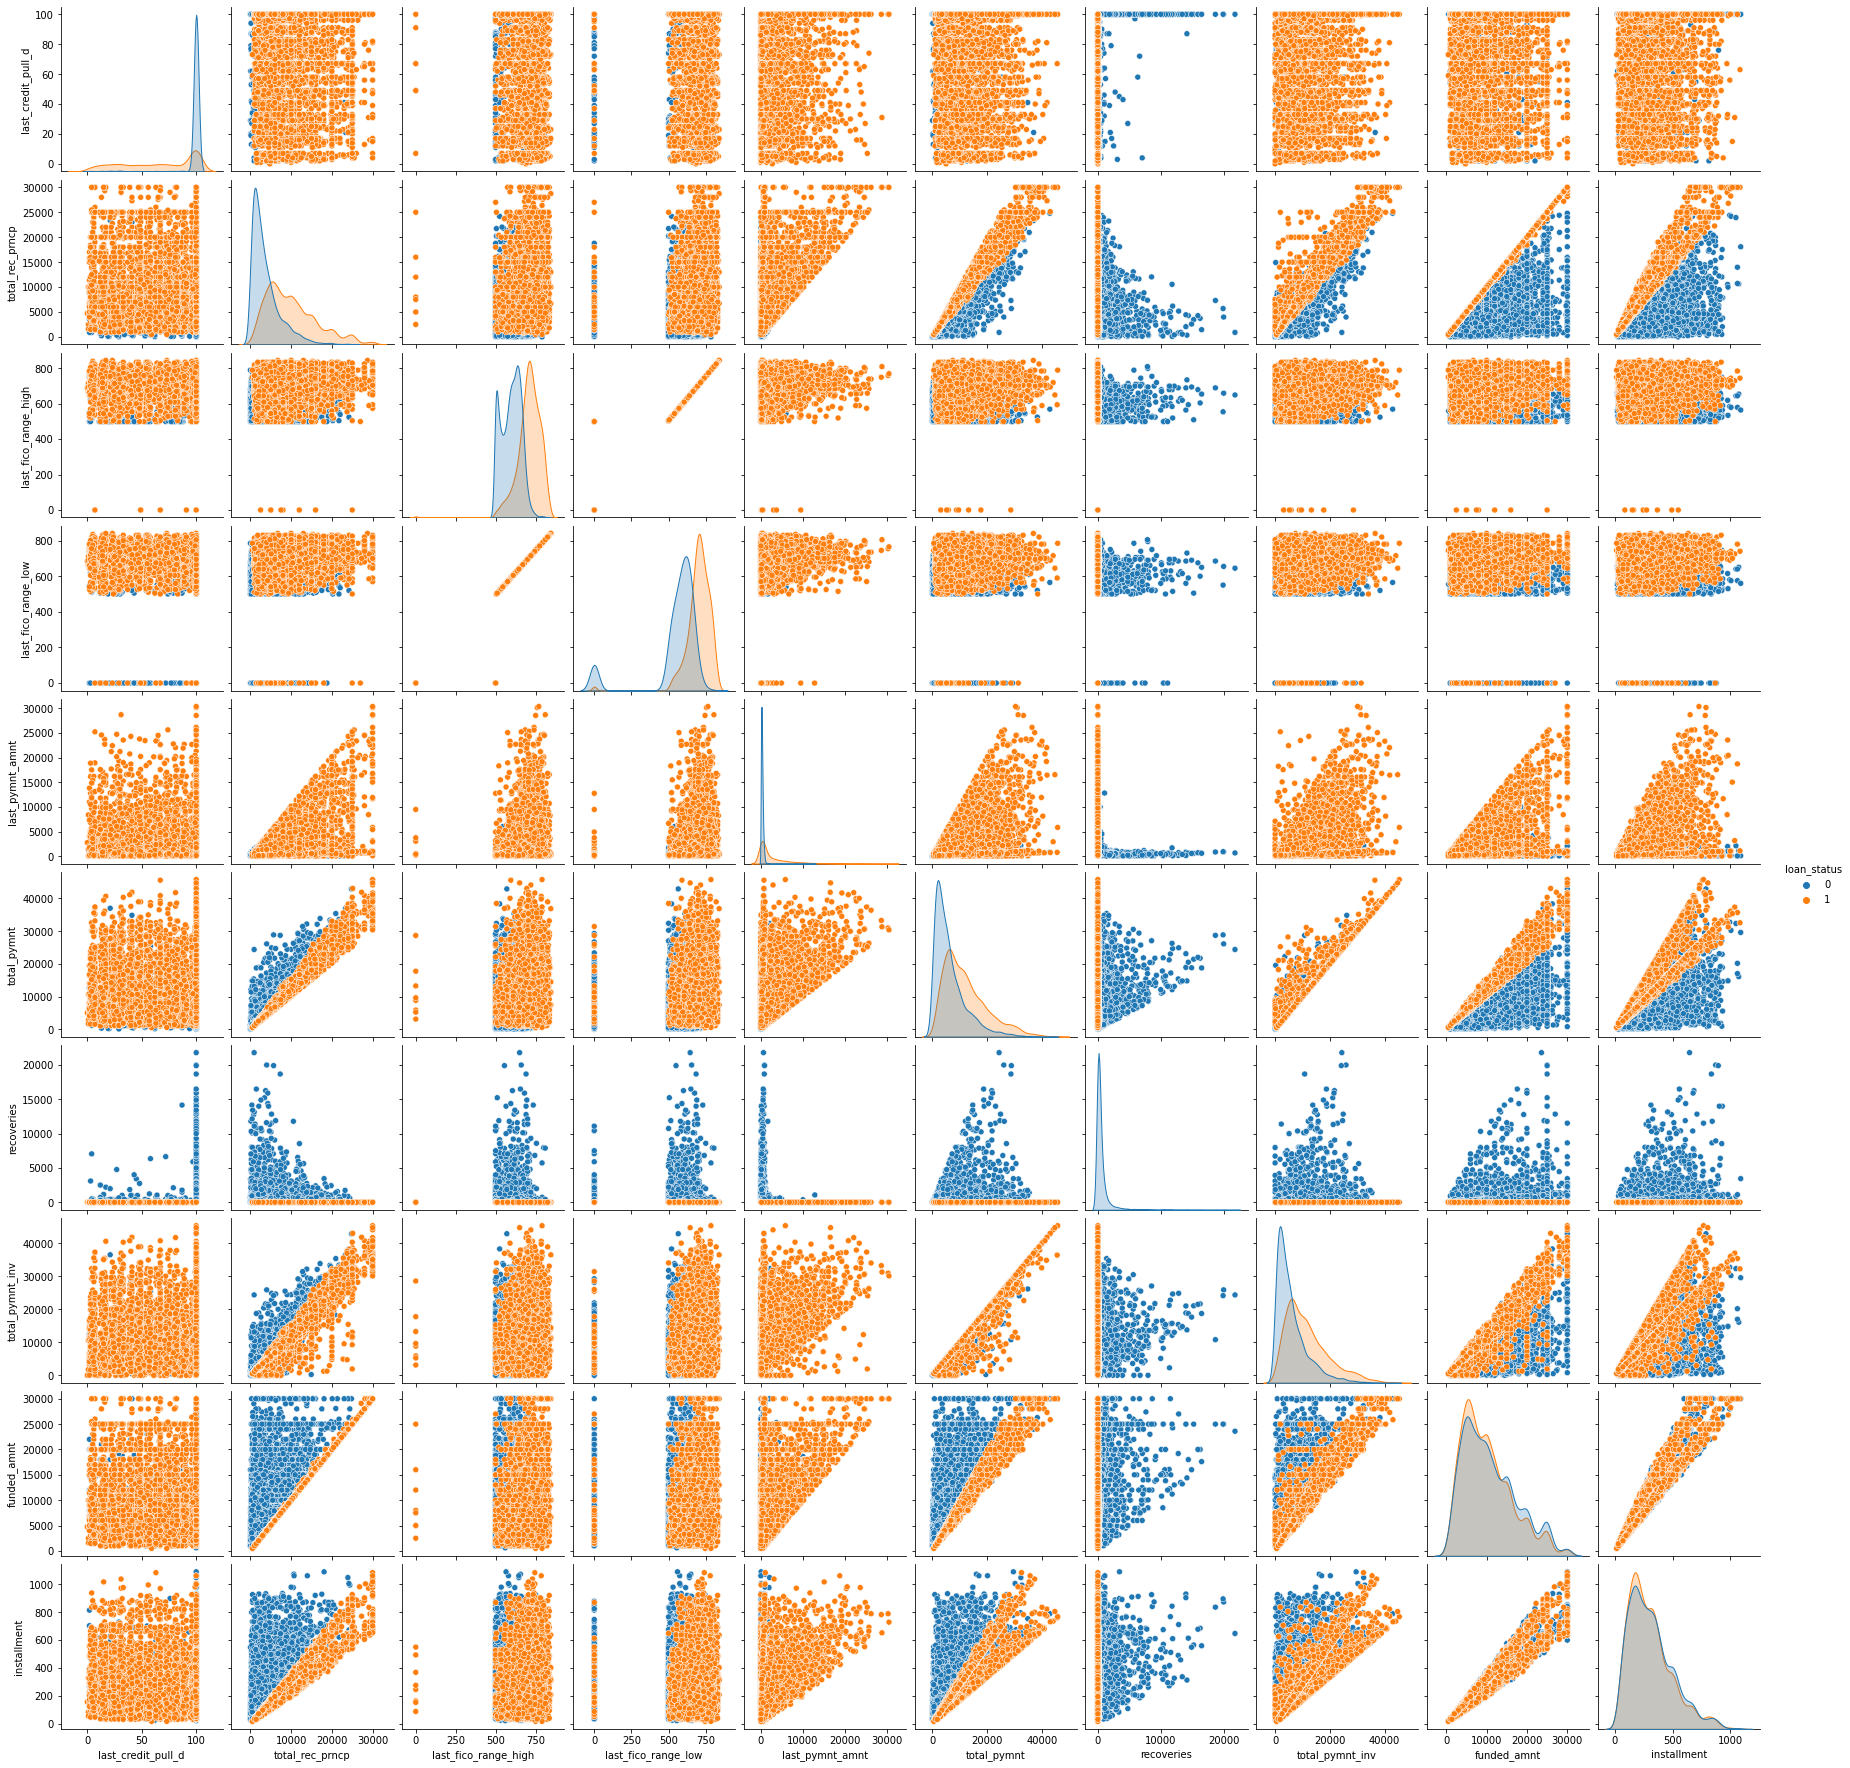

In [ ]:
#visualising pairplot for all observations
sns.pairplot(data=df_final,hue='loan_status')

In [ ]:
#separating dataset into X and y
y= df_final.loan_status
X = df_final.drop(['loan_status'] , axis = 1)

In [ ]:
X.columns


Index(['last_credit_pull_d', 'total_rec_prncp', 'last_fico_range_high',
       'last_fico_range_low', 'last_pymnt_amnt', 'total_pymnt', 'recoveries',
       'total_pymnt_inv', 'funded_amnt', 'installment'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(df_final)
scaled_data=model.transform(df_final)

In [ ]:
scaled_data

array([[1.        , 0.01521533, 0.59123223, ..., 0.06779661, 0.04101572,
        0.        ],
       [1.        , 0.00540067, 0.59123223, ..., 0.17288136, 0.12714128,
        0.        ],
       [1.        , 0.02244933, 0.61492891, ..., 0.16525424, 0.09835211,
        0.        ],
       ...,
       [0.33      , 0.04666667, 0.75118483, ..., 0.03050847, 0.01375255,
        1.        ],
       [0.57      , 0.06666667, 0.76303318, ..., 0.05084746, 0.05077649,
        1.        ],
       [0.62      , 0.31333333, 0.60308057, ..., 0.30169492, 0.2813224 ,
        1.        ]])

In [ ]:
df_final.columns


Index(['last_credit_pull_d', 'total_rec_prncp', 'last_fico_range_high',
       'last_fico_range_low', 'last_pymnt_amnt', 'total_pymnt', 'recoveries',
       'total_pymnt_inv', 'funded_amnt', 'installment', 'loan_status'],
      dtype='object')

In [ ]:
df1 = pd.DataFrame(scaled_data, columns = ['last_credit_pull_d', 'total_rec_prncp', 'last_fico_range_high',
       'last_fico_range_low', 'last_pymnt_amnt', 'total_pymnt', 'recoveries',
       'total_pymnt_inv', 'funded_amnt', 'installment', 'loan_status'])

In [ ]:
df1

,last_credit_pull_d,total_rec_prncp,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,total_pymnt,recoveries,total_pymnt_inv,funded_amnt,installment,loan_status
0,1.00,0.015215,0.591232,0.000000,0.003936,0.021315,0.005368,0.022240,0.067797,0.041016,0.0
1,1.00,0.005401,0.591232,0.000000,0.005012,0.013386,0.008668,0.014243,0.172881,0.127141,0.0
2,1.00,0.022449,0.614929,0.613095,0.003995,0.031535,0.012347,0.032396,0.165254,0.098352,0.0
3,1.00,0.041871,0.733412,0.732143,0.010045,0.048904,0.020371,0.050064,0.288136,0.269496,0.0
4,1.00,0.181116,0.774882,0.773810,0.010714,0.162614,0.029578,0.164741,0.322034,0.288441,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10551,1.00,0.200000,0.828199,0.827381,0.057219,0.148403,0.000000,0.150409,0.186441,0.166491,1.0
10552,0.14,0.600000,0.851896,0.851190,0.027597,0.501306,0.000000,0.496470,0.593220,0.605149,1.0
10553,0.33,0.046667,0.751185,0.750000,0.000636,0.039732,0.000000,0.040814,0.030508,0.013753,1.0
10554,0.57,0.066667,0.763033,0.761905,0.002808,0.054601,0.000000,0.055809,0.050847,0.050776,1.0


In [ ]:
features = ['last_credit_pull_d', 'total_rec_prncp', 'last_fico_range_high',
       'last_fico_range_low', 'last_pymnt_amnt', 'total_pymnt', 'recoveries',
       'total_pymnt_inv', 'funded_amnt', 'installment', 'loan_status']

In [ ]:
'''features = ['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose',
       'title', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low']'''

In [ ]:
features

['last_credit_pull_d',
 'total_rec_prncp',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'total_pymnt',
 'recoveries',
 'total_pymnt_inv',
 'funded_amnt',
 'installment',
 'loan_status']

In [ ]:
from sklearn import preprocessing


In [ ]:
dataset_pr = df1.copy()
     

from scipy.stats import zscore

X = dataset_pr[features].apply(zscore)
     

y = df1['loan_status']
     

X.head()

,last_credit_pull_d,total_rec_prncp,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,total_pymnt,recoveries,total_pymnt_inv,funded_amnt,installment,loan_status
0,0.636462,-1.075708,-1.752006,-4.008705,-0.445903,-1.091301,-0.167206,-1.046499,-1.233053,-1.317218,-1.0
1,0.636462,-1.124798,-1.752006,-4.008705,-0.435895,-1.139413,-0.103168,-1.095244,-0.752093,-0.824946,-1.0
2,0.636462,-1.039526,-1.520790,-0.704929,-0.445356,-1.029289,-0.031791,-0.984591,-0.787001,-0.989498,-1.0
3,0.636462,-0.942383,-0.364711,-0.063419,-0.389111,-0.923895,0.123908,-0.876889,-0.224588,-0.011283,-1.0
4,0.636462,-0.245924,0.039916,0.161110,-0.382885,-0.233929,0.302551,-0.177842,-0.069439,0.097000,-1.0


## Implementing Logistic Regression

In [ ]:
df_log_reg = df1.copy()


In [ ]:
df_log_reg.head()


,last_credit_pull_d,total_rec_prncp,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,total_pymnt,recoveries,total_pymnt_inv,funded_amnt,installment,loan_status
0,1.0,0.015215,0.591232,0.000000,0.003936,0.021315,0.005368,0.022240,0.067797,0.041016,0.0
1,1.0,0.005401,0.591232,0.000000,0.005012,0.013386,0.008668,0.014243,0.172881,0.127141,0.0
2,1.0,0.022449,0.614929,0.613095,0.003995,0.031535,0.012347,0.032396,0.165254,0.098352,0.0
3,1.0,0.041871,0.733412,0.732143,0.010045,0.048904,0.020371,0.050064,0.288136,0.269496,0.0
4,1.0,0.181116,0.774882,0.773810,0.010714,0.162614,0.029578,0.164741,0.322034,0.288441,0.0


In [ ]:
X = df_log_reg.drop(['loan_status'],axis=1)
y = df_log_reg['loan_status']

In [ ]:
columns = X.columns


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [ ]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [ ]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
optimized_clf = grid_lr_clf.best_estimator_


In [ ]:
grid_lr_clf.best_params_


{'C': 1000, 'penalty': 'l2'}

In [ ]:
grid_lr_clf.best_score_


0.9964812559209636

In [ ]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9972932737853566
The accuracy on test data is  0.997158193874329


In [ ]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.997158193874329
The precision on test data is  0.9993682880606444
The recall on test data is  0.9949685534591195
The f1 on test data is  0.9971635676016389
The roc_score on test data is  0.9971672190250574


[[3676   18]
 [   2 3693]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

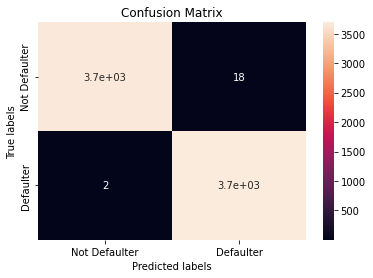

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })


In [ ]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]


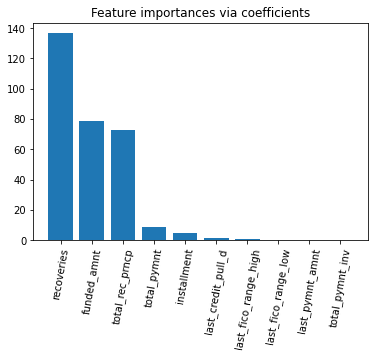

In [ ]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]


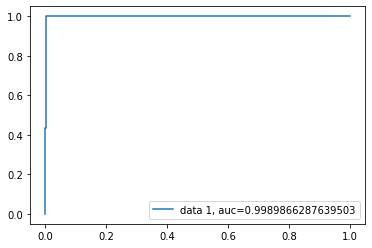

In [ ]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Implementing XGBoost**

In [ ]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

In [ ]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [ ]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [ ]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

[07:49:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [ ]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(microseconds=527186)

In [ ]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 

#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [ ]:
len(train_class_preds_probs)


7389

In [ ]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [ ]:
test_class_preds_probs[:20]


array([0.95314693, 0.04073507, 0.95706373, 0.03951954, 0.04073507,
       0.92057633, 0.04073507, 0.03951954, 0.95133454, 0.95706373,
       0.91523206, 0.8733165 , 0.95706373, 0.04073507, 0.66423965,
       0.955365  , 0.95706373, 0.955365  , 0.95706373, 0.03946459],
      dtype=float32)

In [ ]:
test_class_preds[:20]


[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]

In [ ]:
len(y_train)


7389

In [ ]:
len(train_class_preds)


7389

In [ ]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9948572201921776
The accuracy on test data is  0.9917903378591727


In [ ]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.9917903378591727
The precision on test data is  0.9993682880606444
The recall on test data is  0.984443061605476
The f1 on test data is  0.9918495297805644
The roc_score on train data is  0.9919010179822252


## **Hyperparameter Tuning**

In [ ]:
from xgboost import  XGBClassifier


In [ ]:
X = df_log_reg.drop(['loan_status'],axis=1)
y = df_log_reg['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [ ]:
 gsearch1.best_score_

0.9949075985209704

In [ ]:
optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  1.0
The accuracy on test data is  0.9952651515151515


In [ ]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.9952651515151515
The precision on test data is  1.0
The recall on test data is  0.9906191369606003
The f1 on test data is  0.9952874646559849
The roc_score on train data is  0.9953095684803002


In [ ]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

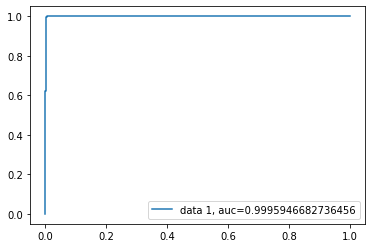

In [ ]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
